# Check for Linearality between DSA_1st_week_infusions and other features

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

## load data

In [4]:
df = pd.read_csv("../data/5JUN2023_Provisional_endo_study_data_to_test_AI.csv").fillna(0)
df.Sex = np.where(df.Sex == "male", 0, 1)
# df.Sex = df.Sex.astype('category')
df.head()

,Sex,A_EPM_distance,A_EPM_pct_open_arms,A_Open_field_distance,A_LOF_pct_center,RP_Withdrawal_latency,OR_lick_time,OR_num_lick_bursts,OR__Lick_burst_length,FSA_Consumption_time,DSA_1st_week_infusions,OPAD_37oC__lick_face,OPAD_46_5oC_lick_face,RP_Delta_hargreaves
0,0,1272.67,31.58,5128.37,12.46,14.48,97.350,69.25,1.372342,66.45,86.0,10.25,1.50,0.06
1,0,1272.52,18.75,5037.27,10.68,14.84,85.125,105.00,1.444197,75.28,87.0,24.75,5.50,0.17
2,0,1462.30,29.03,5340.03,19.06,11.68,205.375,112.75,1.459464,64.88,120.0,15.00,5.00,-1.38
3,0,1288.02,20.59,5384.21,5.36,12.69,185.550,71.75,1.312209,29.45,94.0,15.75,4.25,-0.41
4,0,880.52,4.35,3919.19,1.65,17.56,239.200,136.75,1.912567,61.02,108.0,18.75,5.00,2.49


## scale and split data

In [5]:
# determine which cols to standardize
z_cols = [
    "A_EPM_distance", 
    "A_EPM_pct_open_arms", 
    "A_Open_field_distance", 
    "A_LOF_pct_center", 
    "RP_Withdrawal_latency", 
    "OR_lick_time", 
    "OR_num_lick_bursts", 
    "OR__Lick_burst_length", 
    "FSA_Consumption_time", 
    "OPAD_37oC__lick_face", 
    "OPAD_46_5oC_lick_face", 
    "RP_Delta_hargreaves",
    "DSA_1st_week_infusions"
]
df[z_cols] = StandardScaler().fit_transform(df[z_cols]) # scale data (z scores)

In [6]:
df.head()

,Sex,A_EPM_distance,A_EPM_pct_open_arms,A_Open_field_distance,A_LOF_pct_center,RP_Withdrawal_latency,OR_lick_time,OR_num_lick_bursts,OR__Lick_burst_length,FSA_Consumption_time,DSA_1st_week_infusions,OPAD_37oC__lick_face,OPAD_46_5oC_lick_face,RP_Delta_hargreaves
0,0,-0.018964,0.733076,-0.131135,1.036909,0.201703,-1.263194,-0.717777,-0.528817,0.536718,-0.034145,-0.925942,-2.686533,-0.328085
1,0,-0.019549,-0.266963,-0.236146,0.667732,0.412481,-1.548823,0.864985,-0.081422,1.027931,-0.016174,1.571948,0.561995,-0.196131
2,0,0.720971,0.534316,0.112846,2.405766,-1.437681,1.260741,1.208102,0.013638,0.449379,0.576878,-0.107668,0.155929,-2.055477
3,0,0.040932,-0.123543,0.163772,-0.435649,-0.846332,0.797542,-0.607095,-0.903226,-1.521592,0.109625,0.021534,-0.453170,-0.891886
4,0,-1.549130,-1.389376,-1.524957,-1.205112,2.005024,2.051040,2.270655,2.834815,0.234647,0.361223,0.538338,0.155929,2.586891


## plot for 
The data does not appear to have linear relationship between `DSA_1st_week_infusions` and the other features.

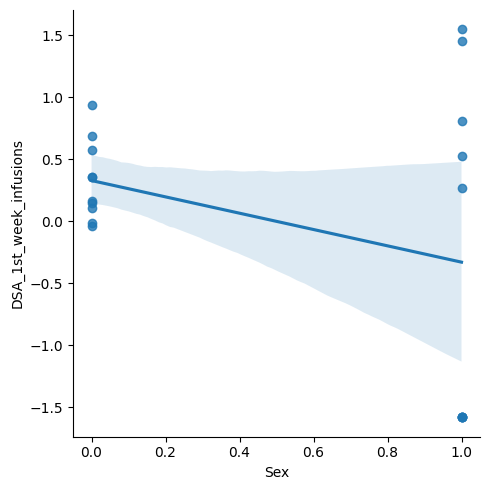

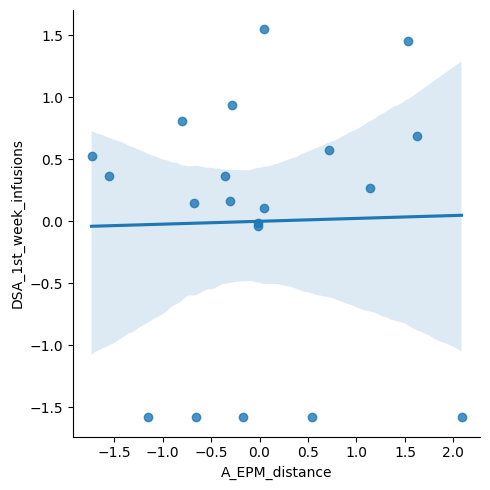

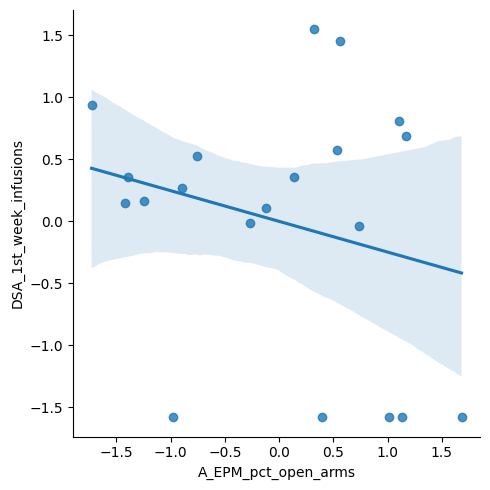

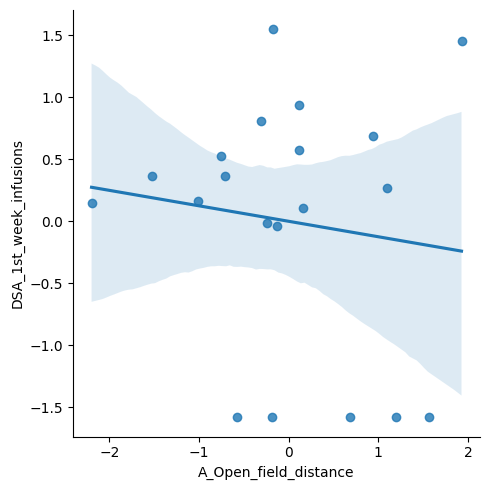

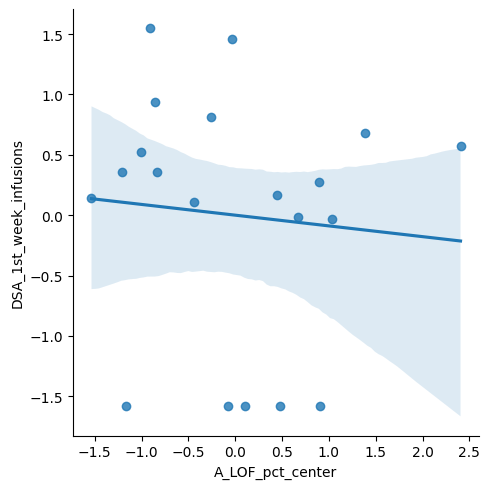

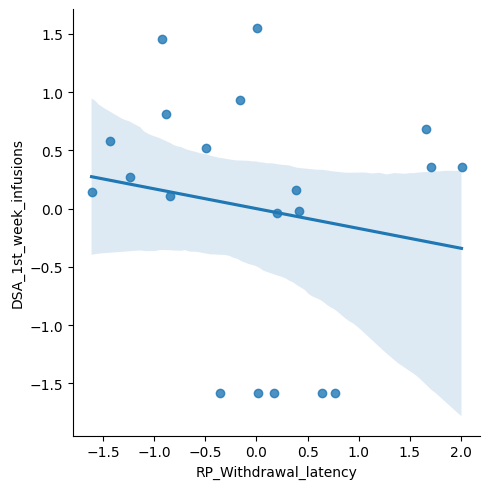

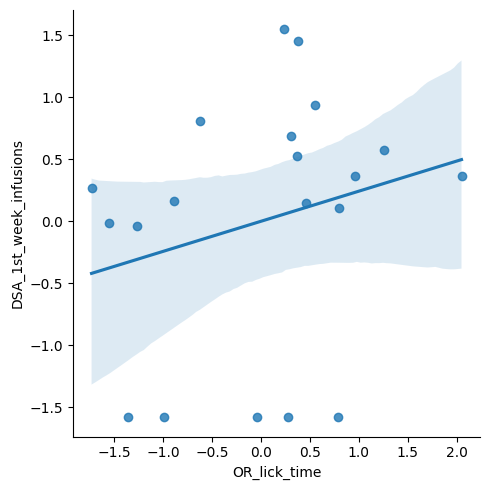

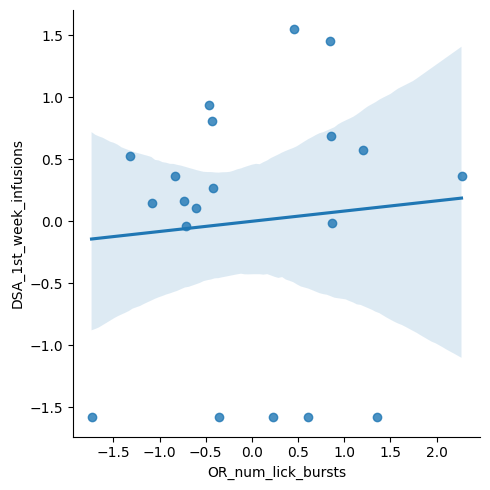

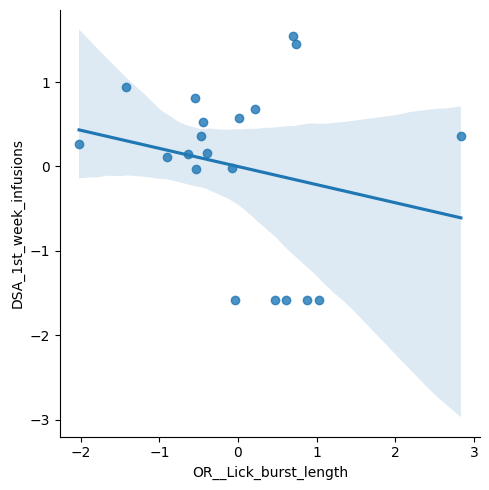

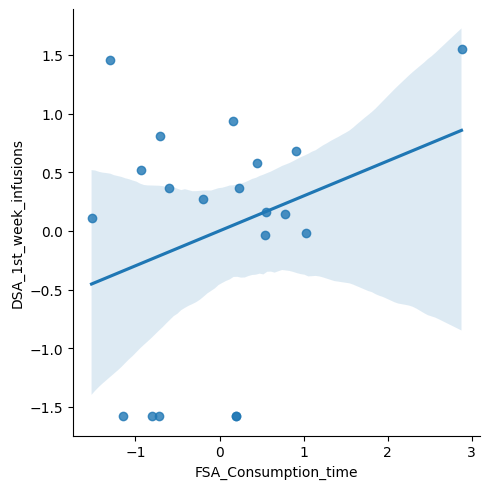

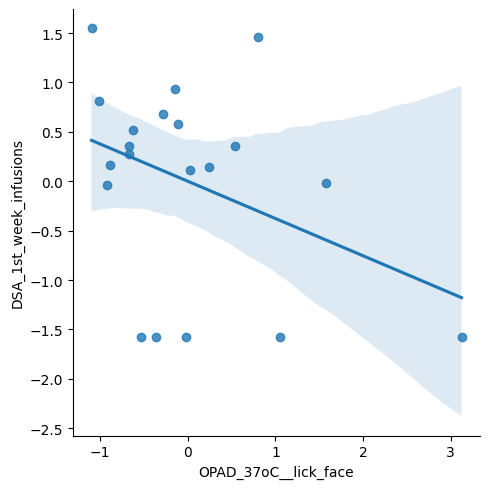

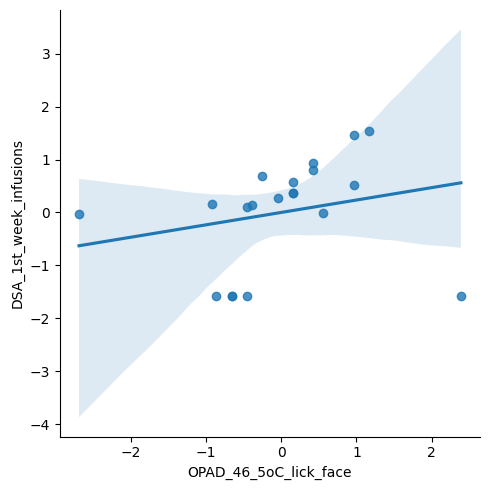

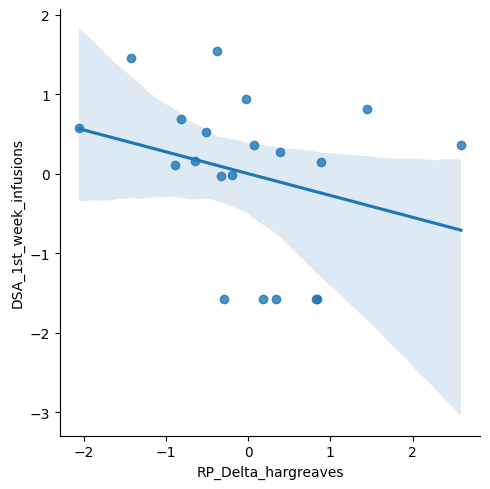

In [7]:
for col in df.columns:
    if col != "DSA_1st_week_infusions":
        sns.lmplot(x=col, y="DSA_1st_week_infusions", data=df, order=1)